In [1]:
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
%matplotlib inline

In [107]:
# df2=pd.read_csv('hawkeye_trace_16_2048_2.csv')
df_hawkeye=pd.read_csv('hawkeye_trace.csv')
df_lru=pd.read_csv('lru_trace.csv')
df_rand=pd.read_csv('random_trace.csv')

In [108]:
df_hawkeye.groupby("Physical Address").mean()

,Set,Way,Victim Address,Program Counter,Hit
Physical Address,,,,,
51756064016,884.0,3.000000,9.250831e+13,4199339.0,0.0
55470813264,1473.0,8.000000,7.950505e+12,4199339.0,0.0
60600537128,832.0,2.000000,2.529258e+14,4208554.0,0.0
60600537192,833.0,11.000000,2.025863e+13,4208554.0,0.0
60600537256,834.0,7.000000,1.787925e+14,4208554.0,0.0
...,...,...,...,...,...
281446706838352,2029.0,6.500000,9.480078e+13,4199311.0,0.0
281447789099920,2030.0,10.666667,1.456206e+14,4199339.0,0.0
281458050509136,677.0,8.500000,4.215113e+13,4199339.0,0.0


In [109]:
df_hawkeye.groupby("Program Counter").mean()

,Set,Way,Physical Address,Victim Address,Hit
Program Counter,,,,,
0,999.395909,7.205165,1.397378e+14,6.443072e+13,0.535228
4199248,397.000000,5.000000,2.356458e+14,2.651190e+14,0.000000
4199255,1600.000000,7.750000,1.449650e+14,5.392643e+13,0.250000
4199296,1031.618980,7.048160,1.412119e+14,1.332998e+14,0.028858
4199300,1032.463268,7.078859,1.417814e+14,1.217278e+14,0.108989
...,...,...,...,...,...
4208717,1422.666667,8.333333,1.981912e+14,0.000000e+00,1.000000
4208724,26.000000,3.023256,2.289556e+13,5.665117e+12,0.930233
4208734,24.000000,4.000000,2.289556e+13,0.000000e+00,0.975000


In [110]:
def get_hitrates(df):
    df=df[ ( df['Program Counter'] !=0 ) 
         ]
    df_pc=df.groupby('Program Counter').mean()
    df_addr=df.groupby('Physical Address').mean()
    
    addr=list(df_addr.index)
    pc=list(df_pc.index)
    
    hit_pc=df_pc['Hit']
    hit_addr=df_addr['Hit']
    
    addr_counter=Counter(df['Physical Address'])
    pc_counter=Counter(df['Program Counter'])
    
    freq_addr=[]
    freq_pc=[]

    for add in addr:
        freq_addr+=[addr_counter[add]]
    for p in pc:
        freq_pc+=[pc_counter[p]]
  
    return addr,pc,hit_addr,hit_pc,freq_addr,freq_pc

In [111]:
_,_,hit_addr_hawkeye,hit_pc_hawkeye,freq_addr_hawkeye,freq_pc_hawkeye=get_hitrates(df_hawkeye)
_,_,hit_addr_lru,hit_pc_lru,freq_addr_lru,freq_pc_lru=get_hitrates(df_lru)
_,_,hit_addr_rand,hit_pc_rand,freq_addr_rand,freq_pc_rand=get_hitrates(df_rand)

In [112]:
hit_addr_hawkeye.mean()

0.0603379093479809

In [113]:
hit_addr_lru.mean()

0.044300374185247696

In [114]:
hit_addr_rand.mean()

0.04122376373449153

Text(0, 0.5, 'Mean Hit Rate')

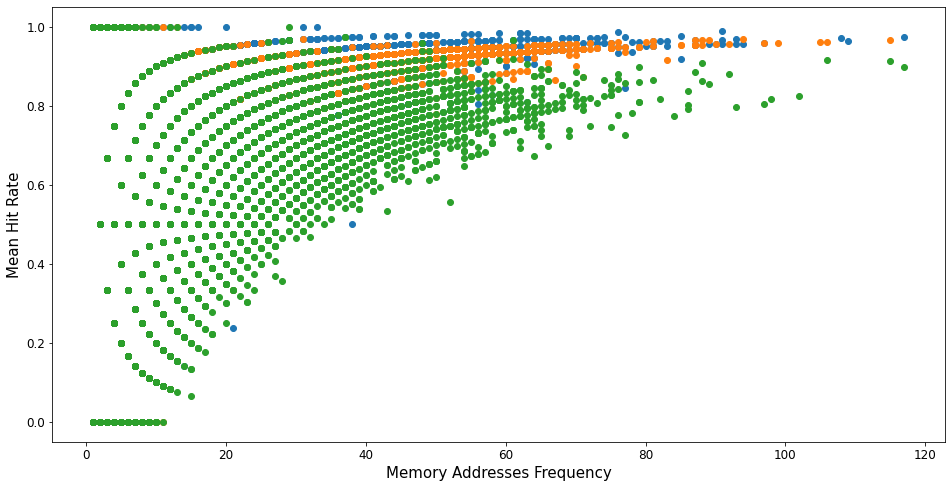

In [118]:
plt.figure(figsize=(16,8))
plt.scatter(freq_addr_hawkeye,hit_addr_hawkeye,c='tab:blue')
plt.scatter(freq_addr_lru,hit_addr_lru, c='tab:orange')
plt.scatter(freq_addr_rand,hit_addr_rand, c='tab:green')

plt.xlabel('Memory Addresses Frequency',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Mean Hit Rate',fontsize=15)


Text(0, 0.5, 'Mean Hit Rate')

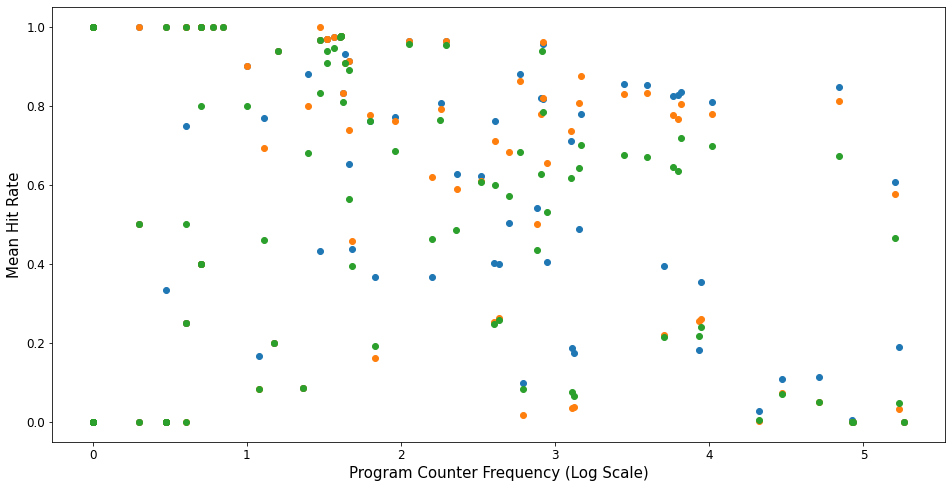

In [116]:
plt.figure(figsize=(16,8))
plt.scatter(np.log10(freq_pc_hawkeye),hit_pc_hawkeye)
plt.scatter(np.log10(freq_pc_lru),hit_pc_lru)
plt.scatter(np.log10(freq_pc_rand),hit_pc_rand)

plt.xlabel('Program Counter Frequency (Log Scale)',fontsize=15)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel('Mean Hit Rate',fontsize=15)
# plt.legend(['',''])